In [1]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels
from statsmodels.tsa.stattools import coint
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as ss
from IPython.display import set_matplotlib_formats
import plotly.express as px

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
# 시각화를 위한 폰트설정
import matplotlib.pyplot as plt

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [24]:
#코스피 지수 불러오기
ks_18 = fdr.DataReader('KS11', '2016-05-25', '2018-01-18')
ks_18.tail(60)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-10-24,2490.49,2489.31,2497.35,2487.17,232010000.0,0.0002
2017-10-25,2492.50,2495.87,2497.41,2481.48,599440000.0,0.0008
2017-10-26,2480.63,2489.60,2495.99,2480.63,646880000.0,-0.0048
2017-10-27,2496.63,2485.44,2499.15,2479.67,511230000.0,0.0064
2017-10-30,2501.93,2513.87,2513.87,2497.42,342010000.0,0.0021
2017-10-31,2523.43,2500.21,2528.32,2498.05,313790000.0,0.0086
2017-11-01,2556.47,2535.97,2556.47,2535.83,361800000.0,0.0131
2017-11-02,2546.36,2560.34,2561.63,2542.02,527730000.0,-0.0040
2017-11-03,2557.97,2558.37,2558.37,2539.72,292770000.0,0.0046


In [25]:
moon_18 = {
    '우리들휴브레인': '118000',
    '바른손': '018700',
    '조광페인트': '004910',
    '유성티엔에스': '024800',
    '신일산업': '002700'}

In [26]:
item_list_moon_18 = []
for item_code in moon_18.values():
    close = fdr.DataReader(item_code, '2016-09-25', '2018-01-18')['Close']
    item_list_moon_18.append(close)

In [27]:
ji_18 = pd.concat(item_list_moon_18,axis=1)
ji_18.columns = moon_18.keys()

ji_18["ks_18"] = ks_18["Close"]

ji_18_norm = (ji_18 - ji_18.min()) / (ji_18.max() - ji_18.min())
ji_18_norm

,우리들휴브레인,바른손,조광페인트,유성티엔에스,신일산업,ks_18
Date,,,,,,
2016-09-26,0.838040,0.852258,0.828244,0.996875,0.493878,0.147984
2016-09-27,0.854591,0.872198,0.885496,1.000000,0.502041,0.174186
2016-09-28,0.883673,0.864288,1.000000,0.975000,0.485714,0.157908
2016-09-29,0.891996,0.912162,0.942748,0.928125,0.493878,0.184026
2016-09-30,0.875351,0.848303,0.885496,0.878125,0.506122,0.142180
...,...,...,...,...,...,...
2018-01-12,0.172433,0.100115,0.030534,0.037500,0.195918,0.897347
2018-01-15,0.189452,0.110415,0.022901,0.018750,0.261224,0.909538
2018-01-16,0.186086,0.103411,0.026718,0.035937,0.253061,0.939575


In [28]:
#60일 이동평균선 만들기 위해 데이터 60일 뒤로 미루기
ji_18_norm["우리들휴브레인_MA60"] = ji_18_norm["우리들휴브레인"].rolling(60).mean()
ji_18_norm["바른손_MA60"] = ji_18_norm["바른손"].rolling(60).mean()
ji_18_norm["조광페인트_MA60"] = ji_18_norm["조광페인트"].rolling(60).mean()
ji_18_norm["유성티엔에스_MA60"] = ji_18_norm["유성티엔에스"].rolling(60).mean()
ji_18_norm["신일산업_MA60"] = ji_18_norm["신일산업"].rolling(60).mean()
ji_18_norm["ks_18_MA60"] = ji_18_norm["ks_18"].rolling(60).mean()

In [29]:
# UpperB, LowerB 구해 볼린저 밴드 그리기
# UpperB = 종가의 이동평균 + (표준편차 * 2)
# LowerB = 종가의 이동평균 - (표준편차 * 2)

ji_18_norm["우리들휴브레인_stddev"] = ji_18_norm["우리들휴브레인"].rolling(60).std()
ji_18_norm["바른손_stddev"] = ji_18_norm["바른손"].rolling(60).std()
ji_18_norm["신일산업_stddev"] = ji_18_norm["신일산업"].rolling(60).std()
ji_18_norm["유성티엔에스_stddev"] = ji_18_norm["유성티엔에스"].rolling(60).std()
ji_18_norm["조광페인트_stddev"] = ji_18_norm["조광페인트"].rolling(60).std()

ji_18_norm["ks_18_stddev"] = ji_18_norm["ks_18"].rolling(60).std()
ji_18_norm["코스피지수_볼린저밴드_상한선"] = ji_18_norm["ks_18_MA60"] + (ji_18_norm["ks_18_stddev"] * 2)
ji_18_norm["코스피지수_볼린저밴드_하한선"] = ji_18_norm["ks_18_MA60"] - (ji_18_norm["ks_18_stddev"] * 2)
ji_18_norm.tail(60)


,우리들휴브레인,바른손,조광페인트,유성티엔에스,신일산업,ks_18,우리들휴브레인_MA60,바른손_MA60,조광페인트_MA60,유성티엔에스_MA60,신일산업_MA60,ks_18_MA60,우리들휴브레인_stddev,바른손_stddev,신일산업_stddev,유성티엔에스_stddev,조광페인트_stddev,ks_18_stddev,코스피지수_볼린저밴드_상한선,코스피지수_볼린저밴드_하한선
Date,,,,,,,,,,,,,,,,,,,,
2017-10-24,0.043576,0.027192,0.255725,0.100000,0.167347,0.887456,0.034530,0.036736,0.446883,0.141719,0.223129,0.730991,0.021336,0.028216,0.196716,0.072418,0.211476,0.080049,0.891088,0.570893
2017-10-25,0.043576,0.036668,0.217557,0.104688,0.134694,0.890809,0.034010,0.035995,0.444656,0.139609,0.215714,0.732129,0.020708,0.027606,0.191364,0.071605,0.213197,0.081838,0.895806,0.568453
2017-10-26,0.041986,0.048616,0.198473,0.115625,0.138776,0.871012,0.033581,0.035535,0.435751,0.137214,0.208639,0.733262,0.020261,0.027151,0.186071,0.069915,0.212114,0.083293,0.899849,0.566675
2017-10-27,0.044417,0.046968,0.217557,0.160938,0.155102,0.897697,0.033159,0.034738,0.427163,0.135521,0.202653,0.734988,0.019751,0.026063,0.181800,0.068034,0.210305,0.085617,0.906223,0.563754
2017-10-30,0.049467,0.054384,0.236641,0.182812,0.155102,0.906536,0.032668,0.033708,0.416985,0.134036,0.196599,0.736620,0.018944,0.023923,0.177095,0.065948,0.204318,0.087946,0.912511,0.560728
2017-10-31,0.051524,0.056032,0.255725,0.175000,0.146939,0.942394,0.032356,0.032953,0.408715,0.133125,0.190340,0.740023,0.018463,0.022420,0.171945,0.064975,0.200539,0.091871,0.923765,0.556281
2017-11-01,0.045259,0.046968,0.255725,0.148438,0.118367,0.997498,0.031974,0.031957,0.402036,0.132578,0.183605,0.744297,0.017940,0.020317,0.166545,0.064700,0.198813,0.097700,0.939698,0.548897
2017-11-02,0.039087,0.043672,0.236641,0.135937,0.126531,0.980637,0.031574,0.031291,0.392812,0.131354,0.176939,0.747727,0.017495,0.019219,0.160481,0.063913,0.193266,0.102295,0.952317,0.543137
2017-11-03,0.038246,0.035844,0.198473,0.148438,0.126531,1.000000,0.031165,0.030735,0.382634,0.130391,0.170340,0.751350,0.017035,0.018575,0.154044,0.063196,0.186945,0.107280,0.965910,0.536791


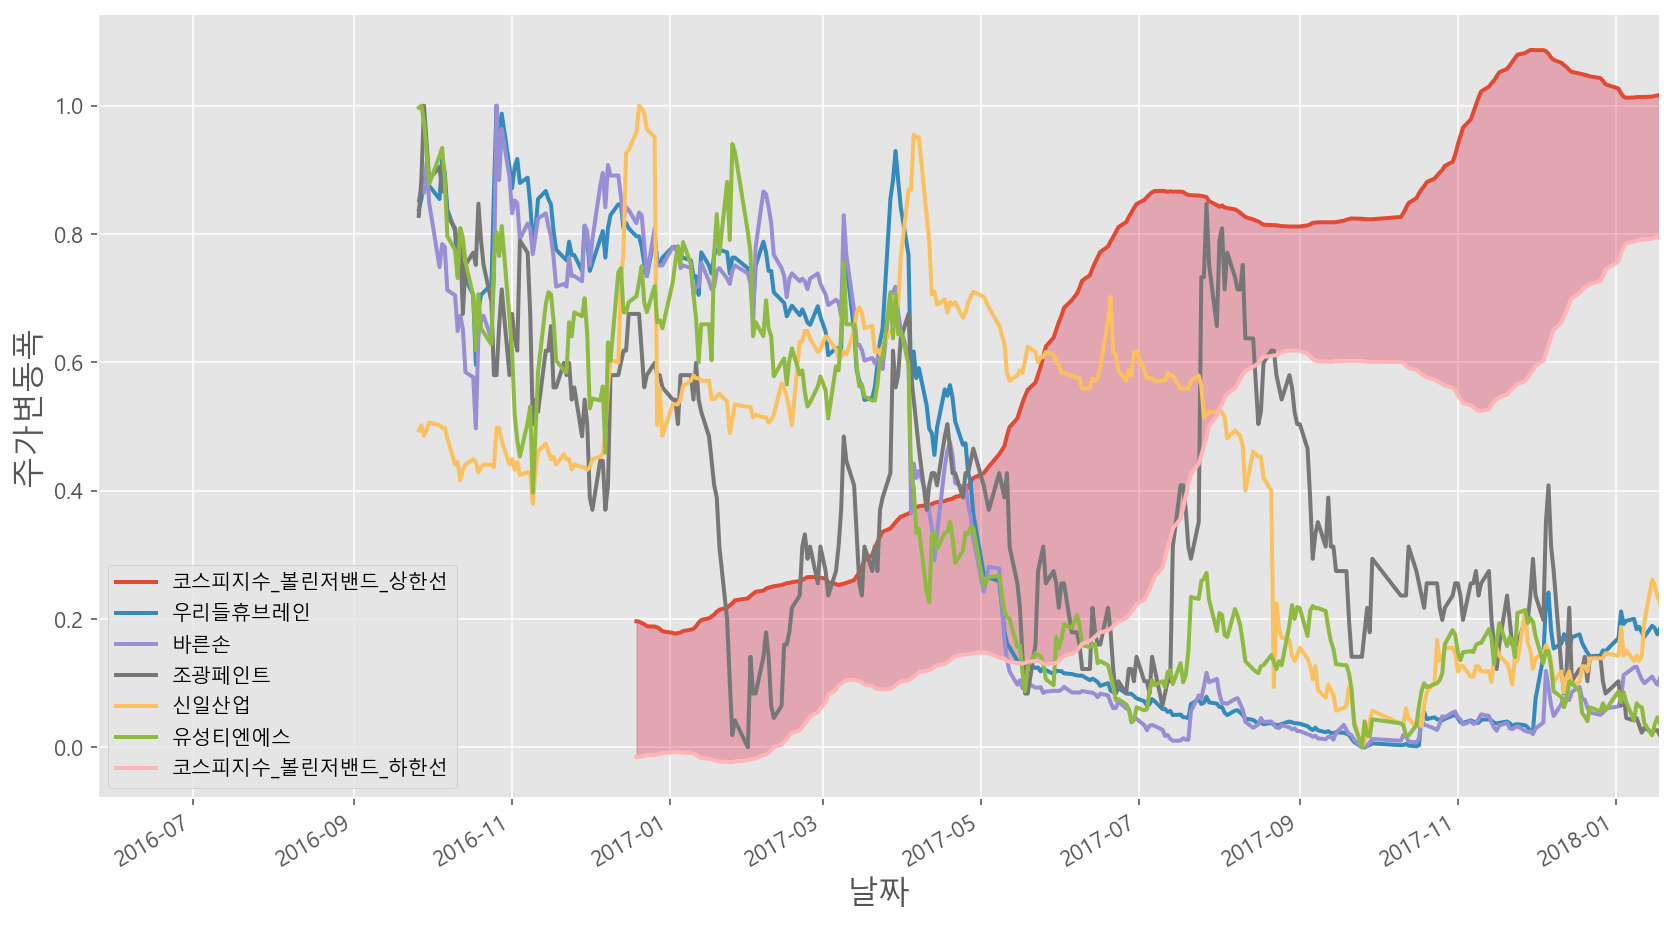

In [30]:
# 주가 기준
ji_18_norm.reset_index(inplace=True)
ji_18_norm['Date'] = pd.to_datetime(ji_18_norm['Date'])
ji_18_norm.set_index('Date', inplace=True)

ji_18_norm[["코스피지수_볼린저밴드_상한선", "우리들휴브레인", "바른손", "조광페인트", "신일산업","유성티엔에스", "코스피지수_볼린저밴드_하한선"]].plot(linewidth=2.0, figsize=(14, 8), xlabel='날짜', ylabel='주가변동폭')
plt.fill_between(ji_18_norm.index, ji_18_norm.코스피지수_볼린저밴드_하한선, ji_18_norm.코스피지수_볼린저밴드_상한선, alpha=0.3, color='crimson')
plt.rc('axes', labelsize=16)
plt.xlim('2016-05-25', '2018-01-18')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.rcParams['axes.facecolor'] = 'e5e5e5'
plt.show()